In [1]:
"""
Created on: Wed. 10 Aug. 2022
Updated on: Mon. 22 Aug. 2022
Updated on: Wed. 5 Oct. 2022
Updated on: Thu. 13 Oct. 2022
Author: Mélina Verger

Fairness evaluation of the models.
"""

# To load the trained models
import pickle

# For data manipulation
import pandas as pd

# To produce all possible combinations
import itertools

# To compute fairness metrics
from sklearn.metrics import confusion_matrix

# Plotting module
import seaborn as sns
import matplotlib.pyplot as plt

# To print with tabular format
from tabulate import tabulate

## Load data sets and trained models

In [2]:
DATA = pickle.load(open("../data/DATA", "rb"))
SPLIT = pickle.load(open("../data/SPLIT", "rb"))

print(DATA)
print(SPLIT)

stInfo
7030


In [3]:
# Load test sets

X_test = pd.read_csv("../data/X_test" + "_" + DATA + "_" + SPLIT + ".csv")
y_test = pd.read_csv("../data/y_test" + "_" + DATA + "_" + SPLIT + ".csv")
#y_test = y_test.values.ravel()

In [4]:
# Load trained models

clf_lr = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_lr", "rb"))
clf_svc = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_svc", "rb"))
clf_knearest = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_knearest", "rb"))
clf_dt = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_dt", "rb"))
clf_rf = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_rf", "rb"))

## Generate all possible feature combinations

In [5]:
combinations = list()
for i in range(len(X_test.columns) + 1):
    for subset in itertools.combinations(X_test.columns, i):
        combinations.append(subset)

combinations = combinations [1:] # remove the first subset that is empty

print(f"For {len(X_test.columns)} features, {len(combinations)} combinations.")

For 7 features, 127 combinations.


In [6]:
combinations[7:17]

[('gender', 'highest_education'),
 ('gender', 'imd_band'),
 ('gender', 'age_band'),
 ('gender', 'disability'),
 ('gender', 'num_of_prev_attempts'),
 ('gender', 'studied_credits'),
 ('highest_education', 'imd_band'),
 ('highest_education', 'age_band'),
 ('highest_education', 'disability'),
 ('highest_education', 'num_of_prev_attempts')]

In [7]:
X_test["highest_education"].value_counts()

0.25    625
0.50    622
0.75    174
0.00     13
1.00      2
Name: highest_education, dtype: int64

## Separate data sets by (un-)protected groups

At that moment, I chose 'gender', 'imd_band' and 'disability' as interesting features to evaluate fairness with.

In [8]:
X_test_gender_1 = X_test[X_test["gender"] == 1]
X_test_gender_0 = X_test[X_test["gender"] == 0]

y_test_gender_1 = y_test.loc[X_test_gender_1.index]
y_test_gender_0 = y_test.loc[X_test_gender_0.index]

In [9]:
X_test_imdband_1 = X_test[X_test["imd_band"] == 1]
X_test_imdband_0 = X_test[X_test["imd_band"] == 0]

y_test_imdband_1 = y_test.loc[X_test_imdband_1.index]
y_test_imdband_0 = y_test.loc[X_test_imdband_0.index]

In [10]:
X_test_disability_1 = X_test[X_test["disability"] == 1]
X_test_disability_0 = X_test[X_test["disability"] == 0]

y_test_disability_1 = y_test.loc[X_test_disability_1.index]
y_test_disability_0 = y_test.loc[X_test_disability_0.index]

## Predictions

### $X_{test}$

In [11]:
# Make predictions with each model
y_pred_lr = clf_lr.predict(X_test)
y_pred_svc = clf_svc.predict(X_test)
y_pred_knearest = clf_knearest.predict(X_test)
y_pred_dt = clf_dt.predict(X_test)

/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### $X_{test}$ gender

In [12]:
y_pred_lr_gender_1 = clf_lr.predict(X_test_gender_1)
y_pred_svc_gender_1 = clf_svc.predict(X_test_gender_1)
y_pred_knearest_gender_1 = clf_knearest.predict(X_test_gender_1)
y_pred_dt_gender_1 = clf_dt.predict(X_test_gender_1)

y_pred_lr_gender_0 = clf_lr.predict(X_test_gender_0)
y_pred_svc_gender_0 = clf_svc.predict(X_test_gender_0)
y_pred_knearest_gender_0 = clf_knearest.predict(X_test_gender_0)
y_pred_dt_gender_0 = clf_dt.predict(X_test_gender_0)

/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

### $X_{test}$ imd band

In [13]:
y_pred_lr_imdband_1 = clf_lr.predict(X_test_imdband_1)
y_pred_svc_imdband_1 = clf_svc.predict(X_test_imdband_1)
y_pred_knearest_imdband_1 = clf_knearest.predict(X_test_imdband_1)
y_pred_dt_imdband_1 = clf_dt.predict(X_test_imdband_1)

y_pred_lr_imdband_0 = clf_lr.predict(X_test_imdband_0)
y_pred_svc_imdband_0 = clf_svc.predict(X_test_imdband_0)
y_pred_knearest_imdband_0 = clf_knearest.predict(X_test_imdband_0)
y_pred_dt_imdband_0 = clf_dt.predict(X_test_imdband_0)

/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

### $X_{test}$ disability

In [14]:
y_pred_lr_disability_1 = clf_lr.predict(X_test_disability_1)
y_pred_svc_disability_1 = clf_svc.predict(X_test_disability_1)
y_pred_knearest_disability_1 = clf_knearest.predict(X_test_disability_1)
y_pred_dt_disability_1 = clf_dt.predict(X_test_disability_1)

y_pred_lr_disability_0 = clf_lr.predict(X_test_disability_0)
y_pred_svc_disability_0 = clf_svc.predict(X_test_disability_0)
y_pred_knearest_disability_0 = clf_knearest.predict(X_test_disability_0)
y_pred_dt_disability_0 = clf_dt.predict(X_test_disability_0)

/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

## Computing fairness metrics

In [15]:
# Compute the confusion matrix for each model and each set

# X_test
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_knearest = confusion_matrix(y_test, y_pred_knearest)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# X_test gender
cm_lr_gender_1 = confusion_matrix(y_test_gender_1, y_pred_lr_gender_1)
cm_svc_gender_1 = confusion_matrix(y_test_gender_1, y_pred_svc_gender_1)
cm_knearest_gender_1 = confusion_matrix(y_test_gender_1, y_pred_knearest_gender_1)
cm_dt_gender_1 = confusion_matrix(y_test_gender_1, y_pred_dt_gender_1)

cm_lr_gender_0 = confusion_matrix(y_test_gender_0, y_pred_lr_gender_0)
cm_svc_gender_0 = confusion_matrix(y_test_gender_0, y_pred_svc_gender_0)
cm_knearest_gender_0 = confusion_matrix(y_test_gender_0, y_pred_knearest_gender_0)
cm_dt_gender_0 = confusion_matrix(y_test_gender_0, y_pred_dt_gender_0)

# X_test imd band
cm_lr_imdband_1 = confusion_matrix(y_test_imdband_1, y_pred_lr_imdband_1)
cm_svc_imdband_1 = confusion_matrix(y_test_imdband_1, y_pred_svc_imdband_1)
cm_knearest_imdband_1 = confusion_matrix(y_test_imdband_1, y_pred_knearest_imdband_1)
cm_dt_imdband_1 = confusion_matrix(y_test_imdband_1, y_pred_dt_imdband_1)

cm_lr_imdband_0 = confusion_matrix(y_test_imdband_0, y_pred_lr_imdband_0)
cm_svc_imdband_0 = confusion_matrix(y_test_imdband_0, y_pred_svc_imdband_0)
cm_knearest_imdband_0 = confusion_matrix(y_test_imdband_0, y_pred_knearest_imdband_0)
cm_dt_imdband_0 = confusion_matrix(y_test_imdband_0, y_pred_dt_imdband_0)

# X_test disability
cm_lr_disability_1 = confusion_matrix(y_test_disability_1, y_pred_lr_disability_1)
cm_svc_disability_1 = confusion_matrix(y_test_disability_1, y_pred_svc_disability_1)
cm_knearest_disability_1 = confusion_matrix(y_test_disability_1, y_pred_knearest_disability_1)
cm_dt_disability_1 = confusion_matrix(y_test_disability_1, y_pred_dt_disability_1)

cm_lr_disability_0 = confusion_matrix(y_test_disability_0, y_pred_lr_disability_0)
cm_svc_disability_0 = confusion_matrix(y_test_disability_0, y_pred_svc_disability_0)
cm_knearest_disability_0 = confusion_matrix(y_test_disability_0, y_pred_knearest_disability_0)
cm_dt_disability_0 = confusion_matrix(y_test_disability_0, y_pred_dt_disability_0)

In [16]:
# Extract TP, TN, FP, FN

# X_test
TN_lr, FP_lr, FN_lr, TP_lr = cm_lr.ravel()
TN_svc, FP_svc, FN_svc, TP_svc = cm_svc.ravel()
TN_knearest, FP_knearest, FN_knearest, TP_knearest = cm_knearest.ravel()
TN_dt, FP_dt, FN_dt, TP_dt = cm_dt.ravel()

# X_test gender
TN_lr_gender_1, FP_lr_gender_1, FN_lr_gender_1, TP_lr_gender_1 = cm_lr_gender_1.ravel()
TN_svc_gender_1, FP_svc_gender_1, FN_svc_gender_1, TP_svc_gender_1 = cm_svc_gender_1.ravel()
TN_knearest_gender_1, FP_knearest_gender_1, FN_knearest_gender_1, TP_knearest_gender_1 = cm_knearest_gender_1.ravel()
TN_dt_gender_1, FP_dt_gender_1, FN_dt_gender_1, TP_dt_gender_1 = cm_dt_gender_1.ravel()

TN_lr_gender_0, FP_lr_gender_0, FN_lr_gender_0, TP_lr_gender_0 = cm_lr_gender_0.ravel()
TN_svc_gender_0, FP_svc_gender_0, FN_svc_gender_0, TP_svc_gender_0 = cm_svc_gender_0.ravel()
TN_knearest_gender_0, FP_knearest_gender_0, FN_knearest_gender_0, TP_knearest_gender_0 = cm_knearest_gender_0.ravel()
TN_dt_gender_0, FP_dt_gender_0, FN_dt_gender_0, TP_dt_gender_0 = cm_dt_gender_0.ravel()

# X_test imd band
TN_lr_imdband_1, FP_lr_imdband_1, FN_lr_imdband_1, TP_lr_imdband_1 = cm_lr_imdband_1.ravel()
TN_svc_imdband_1, FP_svc_imdband_1, FN_svc_imdband_1, TP_svc_imdband_1 = cm_svc_imdband_1.ravel()
TN_knearest_imdband_1, FP_knearest_imdband_1, FN_knearest_imdband_1, TP_knearest_imdband_1 = cm_knearest_imdband_1.ravel()
TN_dt_imdband_1, FP_dt_imdband_1, FN_dt_imdband_1, TP_dt_imdband_1 = cm_dt_imdband_1.ravel()

TN_lr_imdband_0, FP_lr_imdband_0, FN_lr_imdband_0, TP_lr_imdband_0 = cm_lr_imdband_0.ravel()
TN_svc_imdband_0, FP_svc_imdband_0, FN_svc_imdband_0, TP_svc_imdband_0 = cm_svc_imdband_0.ravel()
TN_knearest_imdband_0, FP_knearest_imdband_0, FN_knearest_imdband_0, TP_knearest_imdband_0 = cm_knearest_imdband_0.ravel()
TN_dt_imdband_0, FP_dt_imdband_0, FN_dt_imdband_0, TP_dt_imdband_0 = cm_dt_imdband_0.ravel()

# X_test disability
TN_lr_disability_1, FP_lr_disability_1, FN_lr_disability_1, TP_lr_disability_1 = cm_lr_disability_1.ravel()
TN_svc_disability_1, FP_svc_disability_1, FN_svc_disability_1, TP_svc_disability_1 = cm_svc_disability_1.ravel()
TN_knearest_disability_1, FP_knearest_disability_1, FN_knearest_disability_1, TP_knearest_disability_1 = cm_knearest_disability_1.ravel()
TN_dt_disability_1, FP_dt_disability_1, FN_dt_disability_1, TP_dt_disability_1 = cm_dt_disability_1.ravel()

TN_lr_disability_0, FP_lr_disability_0, FN_lr_disability_0, TP_lr_disability_0 = cm_lr_disability_0.ravel()
TN_svc_disability_0, FP_svc_disability_0, FN_svc_disability_0, TP_svc_disability_0 = cm_svc_disability_0.ravel()
TN_knearest_disability_0, FP_knearest_disability_0, FN_knearest_disability_0, TP_knearest_disability_0 = cm_knearest_disability_0.ravel()
TN_dt_disability_0, FP_dt_disability_0, FN_dt_disability_0, TP_dt_disability_0 = cm_dt_disability_0.ravel()

In [17]:
# Compute fairness metrics
def fairness_metrics(TN, FP, FN, TP):
    N = TN + FP + FN + TP
    TPR = TP / (TP + FN) # equal opportunity
    FPR = FP / (FP + TN) # equalized odds
    PPP = (TP + FP) / N # disparate impact
    FNR = FN / (TP + FN)
    return {"TPR": TPR, "FPR": FPR, "PPP": PPP, "FNR": FNR}

In [18]:
fm_lr = fairness_metrics(TN_lr, FP_lr, FN_lr, TP_lr)
fm_svc = fairness_metrics(TN_svc, FP_svc, FN_svc, TP_svc)
fm_knearest = fairness_metrics(TN_knearest, FP_knearest, FN_knearest, TP_knearest)
fm_dt = fairness_metrics(TN_dt, FP_dt, FN_dt, TP_dt)

fm_lr_gender_1 = fairness_metrics(TN_lr_gender_1, FP_lr_gender_1, FN_lr_gender_1, TP_lr_gender_1)
fm_svc_gender_1 = fairness_metrics(TN_svc_gender_1, FP_svc_gender_1, FN_svc_gender_1, TP_svc_gender_1)
fm_knearest_gender_1 = fairness_metrics(TN_knearest_gender_1, FP_knearest_gender_1, FN_knearest_gender_1, TP_knearest_gender_1)
fm_dt_gender_1 = fairness_metrics(TN_dt_gender_1, FP_dt_gender_1, FN_dt_gender_1, TP_dt_gender_1)

fm_lr_gender_0 = fairness_metrics(TN_lr_gender_0, FP_lr_gender_0, FN_lr_gender_0, TP_lr_gender_0)
fm_svc_gender_0 = fairness_metrics(TN_svc_gender_0, FP_svc_gender_0, FN_svc_gender_0, TP_svc_gender_0)
fm_knearest_gender_0 = fairness_metrics(TN_knearest_gender_0, FP_knearest_gender_0, FN_knearest_gender_0, TP_knearest_gender_0)
fm_dt_gender_0 = fairness_metrics(TN_dt_gender_0, FP_dt_gender_0, FN_dt_gender_0, TP_dt_gender_0)

fm_lr_imdband_1 = fairness_metrics(TN_lr_imdband_1, FP_lr_imdband_1, FN_lr_imdband_1, TP_lr_imdband_1)
fm_svc_imdband_1 = fairness_metrics(TN_svc_imdband_1, FP_svc_imdband_1, FN_svc_imdband_1, TP_svc_imdband_1)
fm_knearest_imdband_1 = fairness_metrics(TN_knearest_imdband_1, FP_knearest_imdband_1, FN_knearest_imdband_1, TP_knearest_imdband_1)
fm_dt_imdband_1 = fairness_metrics(TN_dt_imdband_1, FP_dt_imdband_1, FN_dt_imdband_1, TP_dt_imdband_1)

fm_lr_imdband_0 = fairness_metrics(TN_lr_imdband_0, FP_lr_imdband_0, FN_lr_imdband_0, TP_lr_imdband_0)
fm_svc_imdband_0 = fairness_metrics(TN_svc_imdband_0, FP_svc_imdband_0, FN_svc_imdband_0, TP_svc_imdband_0)
fm_knearest_imdband_0 = fairness_metrics(TN_knearest_imdband_0, FP_knearest_imdband_0, FN_knearest_imdband_0, TP_knearest_imdband_0)
fm_dt_imdband_0 = fairness_metrics(TN_dt_imdband_0, FP_dt_imdband_0, FN_dt_imdband_0, TP_dt_imdband_0)

fm_lr_disability_1 = fairness_metrics(TN_lr_disability_1, FP_lr_disability_1, FN_lr_disability_1, TP_lr_disability_1)
fm_svc_disability_1 = fairness_metrics(TN_svc_disability_1, FP_svc_disability_1, FN_svc_disability_1, TP_svc_disability_1)
fm_knearest_disability_1 = fairness_metrics(TN_knearest_disability_1, FP_knearest_disability_1, FN_knearest_disability_1, TP_knearest_disability_1)
fm_dt_disability_1 = fairness_metrics(TN_dt_disability_1, FP_dt_disability_1, FN_dt_disability_1, TP_dt_disability_1)

fm_lr_disability_0 = fairness_metrics(TN_lr_disability_0, FP_lr_disability_0, FN_lr_disability_0, TP_lr_disability_0)
fm_svc_disability_0 = fairness_metrics(TN_svc_disability_0, FP_svc_disability_0, FN_svc_disability_0, TP_svc_disability_0)
fm_knearest_disability_0 = fairness_metrics(TN_knearest_disability_0, FP_knearest_disability_0, FN_knearest_disability_0, TP_knearest_disability_0)
fm_dt_disability_0 = fairness_metrics(TN_dt_disability_0, FP_dt_disability_0, FN_dt_disability_0, TP_dt_disability_0)

## Results

### $X_{test}$

In [19]:
print(tabulate([["LR", round(fm_lr["TPR"], 2), round(fm_lr["FPR"], 2), round(fm_lr["PPP"], 2), round(fm_lr["FNR"], 2)],
                ["SVC", round(fm_svc["TPR"], 2), round(fm_svc["FPR"], 2), round(fm_svc["PPP"], 2), round(fm_svc["FNR"], 2)],
                ["KNEAREST", round(fm_knearest["TPR"], 2), round(fm_knearest["FPR"], 2), round(fm_knearest["PPP"], 2), round(fm_knearest["FNR"], 2)],
                ["DT", round(fm_dt["TPR"], 2), round(fm_dt["FPR"], 2), round(fm_dt["PPP"], 2), round(fm_dt["FNR"], 2)]],
                headers=["Model", "TPR", "FPR", "PPP", "FNR"]))

Model       TPR    FPR    PPP    FNR
--------  -----  -----  -----  -----
LR         0.95   0.88   0.92   0.05
SVC        0.95   0.88   0.92   0.05
KNEAREST   0.64   0.62   0.64   0.36
DT         0.86   0.78   0.83   0.14


### $X_{test}$ gender

In [20]:
print(tabulate([["LR", round(fm_lr_gender_1["TPR"], 2), round(fm_lr_gender_0["TPR"], 2), round(fm_lr_gender_1["TPR"], 2) - round(fm_lr_gender_0["TPR"], 2), round(fm_lr_gender_1["FPR"], 2), round(fm_lr_gender_0["FPR"], 2), round(fm_lr_gender_1["FPR"], 2) - round(fm_lr_gender_0["FPR"], 2), round(fm_lr_gender_1["PPP"], 2), round(fm_lr_gender_0["PPP"], 2), round(fm_lr_gender_1["PPP"], 2) - round(fm_lr_gender_0["PPP"], 2), round(fm_lr_gender_1["FNR"], 2), round(fm_lr_gender_0["FNR"], 2), round(fm_lr_gender_1["FNR"], 2) - round(fm_lr_gender_0["FNR"], 2)],
                ["SVC", round(fm_svc_gender_1["TPR"], 2), round(fm_svc_gender_0["TPR"], 2), round(fm_svc_gender_1["TPR"], 2) - round(fm_svc_gender_0["TPR"], 2), round(fm_svc_gender_1["FPR"], 2), round(fm_svc_gender_0["FPR"], 2), round(fm_svc_gender_1["FPR"], 2) - round(fm_svc_gender_0["FPR"], 2), round(fm_svc_gender_1["PPP"], 2), round(fm_svc_gender_0["PPP"], 2), round(fm_svc_gender_1["PPP"], 2) - round(fm_svc_gender_0["PPP"], 2), round(fm_svc_gender_1["FNR"], 2), round(fm_svc_gender_0["FNR"], 2), round(fm_svc_gender_1["FNR"], 2) - round(fm_svc_gender_0["FNR"], 2)],
                ["KNEAREST", round(fm_knearest_gender_1["TPR"], 2), round(fm_knearest_gender_0["TPR"], 2), round(fm_knearest_gender_1["TPR"], 2) - round(fm_knearest_gender_0["TPR"], 2), round(fm_knearest_gender_1["FPR"], 2), round(fm_knearest_gender_0["FPR"], 2), round(fm_knearest_gender_1["FPR"], 2) - round(fm_knearest_gender_0["FPR"], 2), round(fm_knearest_gender_1["PPP"], 2), round(fm_knearest_gender_0["PPP"], 2), round(fm_knearest_gender_1["PPP"], 2) - round(fm_knearest_gender_0["PPP"], 2), round(fm_knearest_gender_1["FNR"], 2), round(fm_knearest_gender_0["FNR"], 2), round(fm_knearest_gender_1["FNR"], 2) - round(fm_knearest_gender_0["FNR"], 2)],
                ["DT", round(fm_dt_gender_1["TPR"], 2), round(fm_dt_gender_0["TPR"], 2), round(fm_dt_gender_1["TPR"], 2) - round(fm_dt_gender_0["TPR"], 2), round(fm_dt_gender_1["FPR"], 2), round(fm_dt_gender_0["FPR"], 2), round(fm_dt_gender_1["FPR"], 2) - round(fm_dt_gender_0["FPR"], 2), round(fm_dt_gender_1["PPP"], 2), round(fm_dt_gender_0["PPP"], 2), round(fm_dt_gender_1["PPP"], 2) - round(fm_dt_gender_0["PPP"], 2), round(fm_dt_gender_1["FNR"], 2), round(fm_dt_gender_0["FNR"], 2), round(fm_dt_gender_1["FNR"], 2) - round(fm_dt_gender_0["FNR"], 2)]],
                headers=["Model", "TPR gender 1", "TPR gender 0", "\u0394", "FPR gender 1", "FPR gender 0", "\u0394", "PPP gender 1", "PPP gender 0", "\u0394", "FNR gender 1", "FNR gender 0", "\u0394"]))

Model       TPR gender 1    TPR gender 0      Δ    FPR gender 1    FPR gender 0      Δ    PPP gender 1    PPP gender 0      Δ    FNR gender 1    FNR gender 0      Δ
--------  --------------  --------------  -----  --------------  --------------  -----  --------------  --------------  -----  --------------  --------------  -----
LR                  0.88            0.95  -0.07            0.72            0.9   -0.18            0.81            0.94  -0.13            0.12            0.05   0.07
SVC                 0.9             0.95  -0.05            0.79            0.89  -0.1             0.85            0.93  -0.08            0.1             0.05   0.05
KNEAREST            0.66            0.64   0.02            0.58            0.63  -0.05            0.62            0.64  -0.02            0.34            0.36  -0.02
DT                  0.69            0.88  -0.19            0.73            0.78  -0.05            0.71            0.85  -0.14            0.31            0.12   0.19


In [21]:
# print(tabulate([["LR", round(fm_lr_gender_1["TPR"], 2), round(fm_lr_gender_1["FPR"], 2), round(fm_lr_gender_1["PPP"], 2), round(fm_lr_gender_1["FNR"], 2)],
#                 ["SVC", round(fm_svc_gender_1["TPR"], 2), round(fm_svc_gender_1["FPR"], 2), round(fm_svc_gender_1["PPP"], 2), round(fm_svc_gender_1["FNR"], 2)],
#                 ["KNEAREST", round(fm_knearest_gender_1["TPR"], 2), round(fm_knearest_gender_1["FPR"], 2), round(fm_knearest_gender_1["PPP"], 2), round(fm_knearest_gender_1["FNR"], 2)],
#                 ["DT", round(fm_dt_gender_1["TPR"], 2), round(fm_dt_gender_1["FPR"], 2), round(fm_dt_gender_1["PPP"], 2), round(fm_dt_gender_1["FNR"], 2)]],
#                 headers=["Model", "TPR", "FPR", "PPP", "FNR"]))

In [22]:
# print(tabulate([["LR", round(fm_lr_gender_0["TPR"], 2), round(fm_lr_gender_0["FPR"], 2), round(fm_lr_gender_0["PPP"], 2), round(fm_lr_gender_0["FNR"], 2)],
#                 ["SVC", round(fm_svc_gender_0["TPR"], 2), round(fm_svc_gender_0["FPR"], 2), round(fm_svc_gender_0["PPP"], 2), round(fm_svc_gender_0["FNR"], 2)],
#                 ["KNEAREST", round(fm_knearest_gender_0["TPR"], 2), round(fm_knearest_gender_0["FPR"], 2), round(fm_knearest_gender_0["PPP"], 2), round(fm_knearest_gender_0["FNR"], 2)],
#                 ["DT", round(fm_dt_gender_0["TPR"], 2), round(fm_dt_gender_0["FPR"], 2), round(fm_dt_gender_0["PPP"], 2), round(fm_dt_gender_0["FNR"], 2)]],
#                 headers=["Model", "TPR", "FPR", "PPP", "FNR"]))

### $X_{test}$ imd band

In [23]:
print(tabulate([["LR", round(fm_lr_imdband_1["TPR"], 2), round(fm_lr_imdband_0["TPR"], 2), round(fm_lr_imdband_1["TPR"], 2) - round(fm_lr_imdband_0["TPR"], 2), round(fm_lr_imdband_1["FPR"], 2), round(fm_lr_imdband_0["FPR"], 2), round(fm_lr_imdband_1["FPR"], 2) - round(fm_lr_imdband_0["FPR"], 2), round(fm_lr_imdband_1["PPP"], 2), round(fm_lr_imdband_0["PPP"], 2), round(fm_lr_imdband_1["PPP"], 2) - round(fm_lr_imdband_0["PPP"], 2), round(fm_lr_imdband_1["FNR"], 2), round(fm_lr_imdband_0["FNR"], 2), round(fm_lr_imdband_1["FNR"], 2) - round(fm_lr_imdband_0["FNR"], 2)],
                ["SVC", round(fm_svc_imdband_1["TPR"], 2), round(fm_svc_imdband_0["TPR"], 2), round(fm_svc_imdband_1["TPR"], 2) - round(fm_svc_imdband_0["TPR"], 2), round(fm_svc_imdband_1["FPR"], 2), round(fm_svc_imdband_0["FPR"], 2), round(fm_svc_imdband_1["FPR"], 2) - round(fm_svc_imdband_0["FPR"], 2), round(fm_svc_imdband_1["PPP"], 2), round(fm_svc_imdband_0["PPP"], 2), round(fm_svc_imdband_1["PPP"], 2) - round(fm_svc_imdband_0["PPP"], 2), round(fm_svc_imdband_1["FNR"], 2), round(fm_svc_imdband_0["FNR"], 2), round(fm_svc_imdband_1["FNR"], 2) - round(fm_svc_imdband_0["FNR"], 2)],
                ["KNEAREST", round(fm_knearest_imdband_1["TPR"], 2), round(fm_knearest_imdband_0["TPR"], 2), round(fm_knearest_imdband_1["TPR"], 2) - round(fm_knearest_imdband_0["TPR"], 2), round(fm_knearest_imdband_1["FPR"], 2), round(fm_knearest_imdband_0["FPR"], 2), round(fm_knearest_imdband_1["FPR"], 2) - round(fm_knearest_imdband_0["FPR"], 2), round(fm_knearest_imdband_1["PPP"], 2), round(fm_knearest_imdband_0["PPP"], 2), round(fm_knearest_imdband_1["PPP"], 2) - round(fm_knearest_imdband_0["PPP"], 2), round(fm_knearest_imdband_1["FNR"], 2), round(fm_knearest_imdband_0["FNR"], 2), round(fm_knearest_imdband_1["FNR"], 2) - round(fm_knearest_imdband_0["FNR"], 2)],
                ["DT", round(fm_dt_imdband_1["TPR"], 2), round(fm_dt_imdband_0["TPR"], 2), round(fm_dt_imdband_1["TPR"], 2) - round(fm_dt_imdband_0["TPR"], 2), round(fm_dt_imdband_1["FPR"], 2), round(fm_dt_imdband_0["FPR"], 2), round(fm_dt_imdband_1["FPR"], 2) - round(fm_dt_imdband_0["FPR"], 2), round(fm_dt_imdband_1["PPP"], 2), round(fm_dt_imdband_0["PPP"], 2), round(fm_dt_imdband_1["PPP"], 2) - round(fm_dt_imdband_0["PPP"], 2), round(fm_dt_imdband_1["FNR"], 2), round(fm_dt_imdband_0["FNR"], 2), round(fm_dt_imdband_1["FNR"], 2) - round(fm_dt_imdband_0["FNR"], 2)]],
                headers=["Model", "TPR imd 1", "TPR imd 0", "\u0394", "FPR imd 1", "FPR imd 0", "\u0394", "PPP imd 1", "PPP imd 0", "\u0394", "FNR imd 1", "FNR imd 0", "\u0394"]))

Model       TPR imd 1    TPR imd 0      Δ    FPR imd 1    FPR imd 0      Δ    PPP imd 1    PPP imd 0      Δ    FNR imd 1    FNR imd 0     Δ
--------  -----------  -----------  -----  -----------  -----------  -----  -----------  -----------  -----  -----------  -----------  ----
LR               0.91         0.99  -0.08         0.82         0.99  -0.17         0.88         0.99  -0.11         0.09         0.01  0.08
SVC              0.91         0.99  -0.08         0.82         0.99  -0.17         0.88         0.99  -0.11         0.09         0.01  0.08
KNEAREST         0.52         0.81  -0.29         0.55         0.77  -0.22         0.53         0.8   -0.27         0.48         0.19  0.29
DT               0.8          0.95  -0.15         0.72         0.9   -0.18         0.77         0.93  -0.16         0.2          0.05  0.15


In [24]:
# print(tabulate([["LR", round(fm_lr_imdband_1["TPR"], 2), round(fm_lr_imdband_1["FPR"], 2), round(fm_lr_imdband_1["PPP"], 2), round(fm_lr_imdband_1["FNR"], 2)],
#                 ["SVC", round(fm_svc_imdband_1["TPR"], 2), round(fm_svc_imdband_1["FPR"], 2), round(fm_svc_imdband_1["PPP"], 2), round(fm_svc_imdband_1["FNR"], 2)],
#                 ["KNEAREST", round(fm_knearest_imdband_1["TPR"], 2), round(fm_knearest_imdband_1["FPR"], 2), round(fm_knearest_imdband_1["PPP"], 2), round(fm_knearest_imdband_1["FNR"], 2)],
#                 ["DT", round(fm_dt_imdband_1["TPR"], 2), round(fm_dt_imdband_1["FPR"], 2), round(fm_dt_imdband_1["PPP"], 2), round(fm_dt_imdband_1["FNR"], 2)]],
#                 headers=["Model", "TPR", "FPR", "PPP", "FNR"]))

In [25]:
# print(tabulate([["LR", round(fm_lr_imdband_0["TPR"], 2), round(fm_lr_imdband_0["FPR"], 2), round(fm_lr_imdband_0["PPP"], 2), round(fm_lr_imdband_0["FNR"], 2)],
#                 ["SVC", round(fm_svc_imdband_0["TPR"], 2), round(fm_svc_imdband_0["FPR"], 2), round(fm_svc_imdband_0["PPP"], 2), round(fm_svc_imdband_0["FNR"], 2)],
#                 ["KNEAREST", round(fm_knearest_imdband_0["TPR"], 2), round(fm_knearest_imdband_0["FPR"], 2), round(fm_knearest_imdband_0["PPP"], 2), round(fm_knearest_imdband_0["FNR"], 2)],
#                 ["DT", round(fm_dt_imdband_0["TPR"], 2), round(fm_dt_imdband_0["FPR"], 2), round(fm_dt_imdband_0["PPP"], 2), round(fm_dt_imdband_0["FNR"], 2)]],
#                 headers=["Model", "TPR", "FPR", "PPP", "FNR"]))

### $X_{test}$ disability

In [26]:
print(tabulate([["LR", round(fm_lr_disability_1["TPR"], 2), round(fm_lr_disability_0["TPR"], 2), round(fm_lr_disability_1["TPR"], 2) - round(fm_lr_disability_0["TPR"], 2), round(fm_lr_disability_1["FPR"], 2), round(fm_lr_disability_0["FPR"], 2), round(fm_lr_disability_1["FPR"], 2) - round(fm_lr_disability_0["FPR"], 2), round(fm_lr_disability_1["PPP"], 2), round(fm_lr_disability_0["PPP"], 2), round(fm_lr_disability_1["PPP"], 2) - round(fm_lr_disability_0["PPP"], 2), round(fm_lr_disability_1["FNR"], 2), round(fm_lr_disability_0["FNR"], 2), round(fm_lr_disability_1["FNR"], 2) - round(fm_lr_disability_0["FNR"], 2)],
                ["SVC", round(fm_svc_disability_1["TPR"], 2), round(fm_svc_disability_0["TPR"], 2), round(fm_svc_disability_1["TPR"], 2) - round(fm_svc_disability_0["TPR"], 2), round(fm_svc_disability_1["FPR"], 2), round(fm_svc_disability_0["FPR"], 2), round(fm_svc_disability_1["FPR"], 2) - round(fm_svc_disability_0["FPR"], 2), round(fm_svc_disability_1["PPP"], 2), round(fm_svc_disability_0["PPP"], 2), round(fm_svc_disability_1["PPP"], 2) - round(fm_svc_disability_0["PPP"], 2), round(fm_svc_disability_1["FNR"], 2), round(fm_svc_disability_0["FNR"], 2), round(fm_svc_disability_1["FNR"], 2) - round(fm_svc_disability_0["FNR"], 2)],
                ["KNEAREST", round(fm_knearest_disability_1["TPR"], 2), round(fm_knearest_disability_0["TPR"], 2), round(fm_knearest_disability_1["TPR"], 2) - round(fm_knearest_disability_0["TPR"], 2), round(fm_knearest_disability_1["FPR"], 2), round(fm_knearest_disability_0["FPR"], 2), round(fm_knearest_disability_1["FPR"], 2) - round(fm_knearest_disability_0["FPR"], 2), round(fm_knearest_disability_1["PPP"], 2), round(fm_knearest_disability_0["PPP"], 2), round(fm_knearest_disability_1["PPP"], 2) - round(fm_knearest_disability_0["PPP"], 2), round(fm_knearest_disability_1["FNR"], 2), round(fm_knearest_disability_0["FNR"], 2), round(fm_knearest_disability_1["FNR"], 2) - round(fm_knearest_disability_0["FNR"], 2)],
                ["DT", round(fm_dt_disability_1["TPR"], 2), round(fm_dt_disability_0["TPR"], 2), round(fm_dt_disability_1["TPR"], 2) - round(fm_dt_disability_0["TPR"], 2), round(fm_dt_disability_1["FPR"], 2), round(fm_dt_disability_0["FPR"], 2), round(fm_dt_disability_1["FPR"], 2) - round(fm_dt_disability_0["FPR"], 2), round(fm_dt_disability_1["PPP"], 2), round(fm_dt_disability_0["PPP"], 2), round(fm_dt_disability_1["PPP"], 2) - round(fm_dt_disability_0["PPP"], 2), round(fm_dt_disability_1["FNR"], 2), round(fm_dt_disability_0["FNR"], 2), round(fm_dt_disability_1["FNR"], 2) - round(fm_dt_disability_0["FNR"], 2)]],
                headers=["Model", "TPR disab. 1", "TPR disab. 0", "\u0394", "FPR disab. 1", "FPR disab. 0", "\u0394", "PPP disab. 1", "PPP disab. 0", "\u0394", "FNR disab. 1", "FNR disab. 0", "\u0394"]))

Model       TPR disab. 1    TPR disab. 0      Δ    FPR disab. 1    FPR disab. 0      Δ    PPP disab. 1    PPP disab. 0      Δ    FNR disab. 1    FNR disab. 0      Δ
--------  --------------  --------------  -----  --------------  --------------  -----  --------------  --------------  -----  --------------  --------------  -----
LR                  0.9             0.95  -0.05            0.75            0.9   -0.15            0.83            0.93  -0.1             0.1             0.05   0.05
SVC                 0.9             0.95  -0.05            0.75            0.9   -0.15            0.83            0.93  -0.1             0.1             0.05   0.05
KNEAREST            0.81            0.63   0.18            0.74            0.6    0.14            0.77            0.62   0.15            0.19            0.37  -0.18
DT                  0.72            0.87  -0.15            0.68            0.79  -0.11            0.7             0.84  -0.14            0.28            0.13   0.15


In [27]:
# print(tabulate([["LR", round(fm_lr_disability_1["TPR"], 2), round(fm_lr_disability_1["FPR"], 2), round(fm_lr_disability_1["PPP"], 2), round(fm_lr_disability_1["FNR"], 2)],
#                 ["SVC", round(fm_svc_disability_1["TPR"], 2), round(fm_svc_disability_1["FPR"], 2), round(fm_svc_disability_1["PPP"], 2), round(fm_svc_disability_1["FNR"], 2)],
#                 ["KNEAREST", round(fm_knearest_disability_1["TPR"], 2), round(fm_knearest_disability_1["FPR"], 2), round(fm_knearest_disability_1["PPP"], 2), round(fm_knearest_disability_1["FNR"], 2)],
#                 ["DT", round(fm_dt_disability_1["TPR"], 2), round(fm_dt_disability_1["FPR"], 2), round(fm_dt_disability_1["PPP"], 2), round(fm_dt_disability_1["FNR"], 2)]],
#                 headers=["Model", "TPR", "FPR", "PPP", "FNR"]))

In [28]:
# print(tabulate([["LR", round(fm_lr_disability_0["TPR"], 2), round(fm_lr_disability_0["FPR"], 2), round(fm_lr_disability_0["PPP"], 2), round(fm_lr_disability_0["FNR"], 2)],
#                 ["SVC", round(fm_svc_disability_0["TPR"], 2), round(fm_svc_disability_0["FPR"], 2), round(fm_svc_disability_0["PPP"], 2), round(fm_svc_disability_0["FNR"], 2)],
#                 ["KNEAREST", round(fm_knearest_disability_0["TPR"], 2), round(fm_knearest_disability_0["FPR"], 2), round(fm_knearest_disability_0["PPP"], 2), round(fm_knearest_disability_0["FNR"], 2)],
#                 ["DT", round(fm_dt_disability_0["TPR"], 2), round(fm_dt_disability_0["FPR"], 2), round(fm_dt_disability_0["PPP"], 2), round(fm_dt_disability_0["FNR"], 2)]],
#                 headers=["Model", "TPR", "FPR", "PPP", "FNR"]))

## Prediction probability distributions
(probability estimates)

In [29]:
models = [clf_lr, clf_knearest, clf_dt, clf_rf]

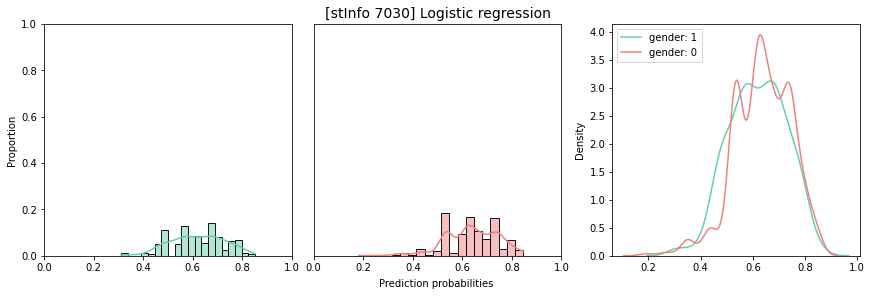

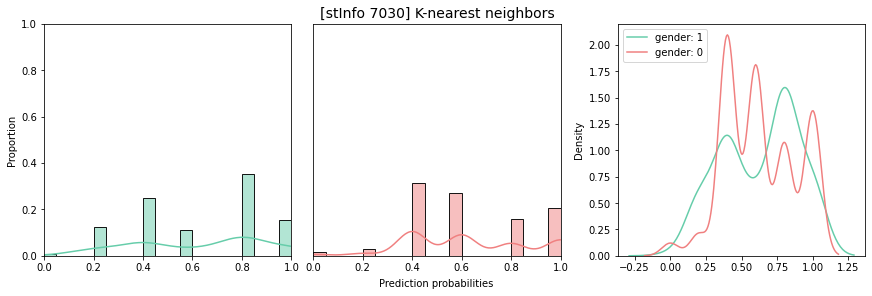

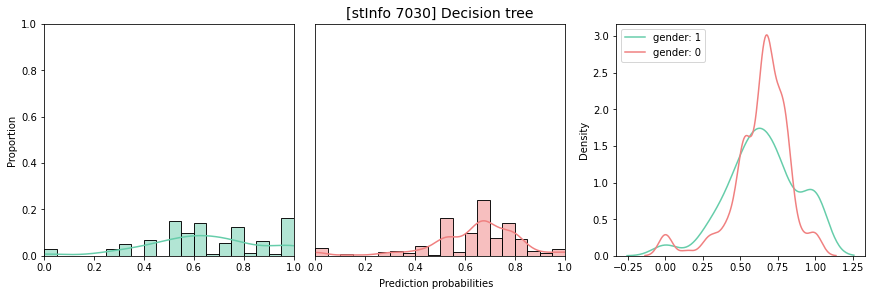

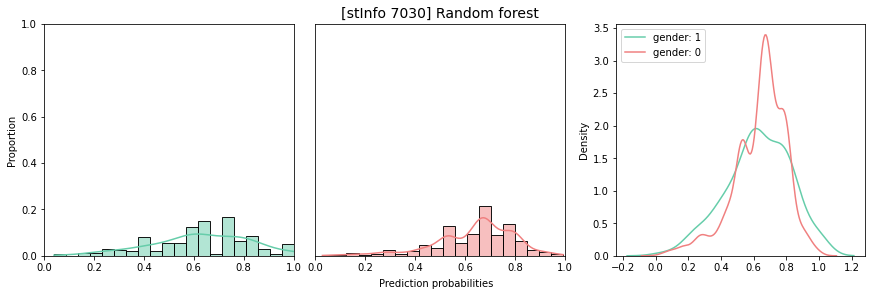

In [30]:
# Gender

for model in models:

    if model == clf_lr:
        model_name = "Logistic regression"
    elif model == clf_knearest:
        model_name = "K-nearest neighbors"
    elif model == clf_dt:
        model_name = "Decision tree"
    else:
        model_name = "Random forest"
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
    fig.supxlabel("Prediction probabilities", fontsize=10)
    ax0 = sns.histplot(ax=axes[0], data=model.predict_proba(X_test_gender_1)[:, 1], kde=True, stat="proportion", color="mediumaquamarine", bins=20)
    ax0.set_ylim(0, 1)
    ax0.set_xlim(0, 1)
    ax1 = sns.histplot(ax=axes[1], data=model.predict_proba(X_test_gender_0)[:, 1], kde=True, stat="proportion", color="lightcoral", bins=20)
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, 1)
    ax1.set_yticklabels([]) # turn off y ticks labels
    ax1.yaxis.set_visible(False)
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_gender_1)[:, 1], color="mediumaquamarine", label="gender: 1")
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_gender_0)[:, 1], color="lightcoral", label="gender: 0")
    plt.legend(loc="upper left")
    ax1.set_title(f"[{DATA} {SPLIT}] {model_name}", loc="center", fontsize=14)

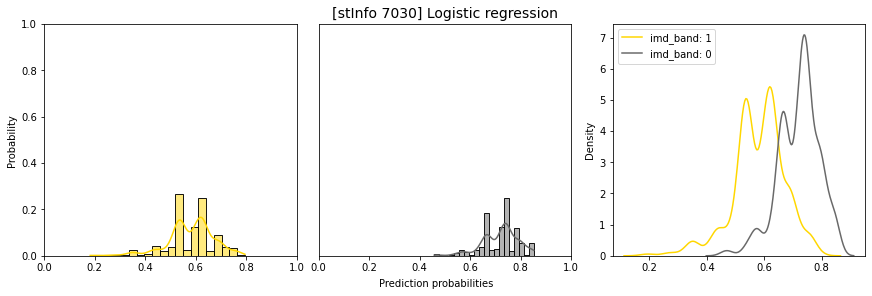

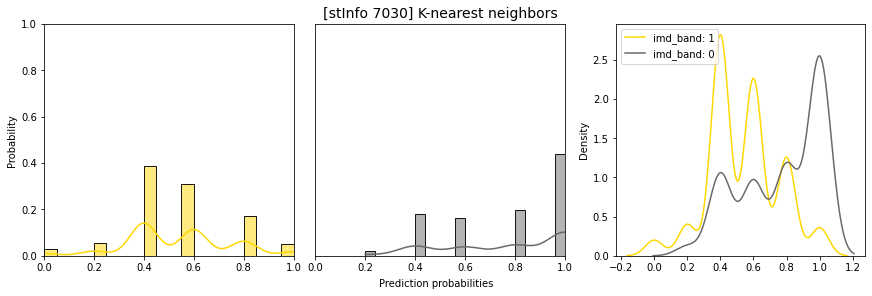

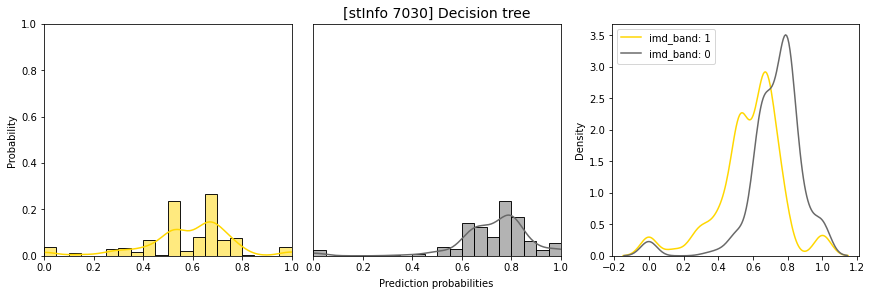

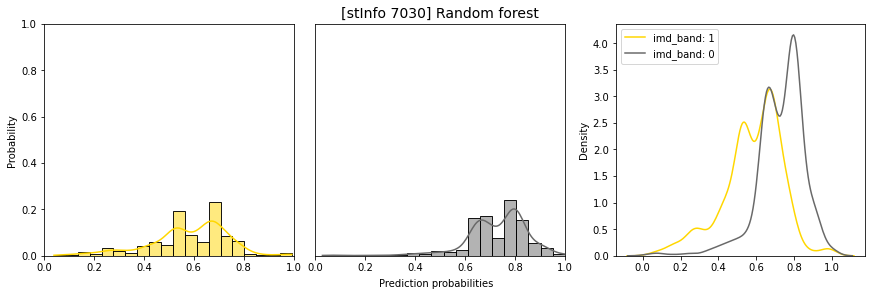

In [31]:
# Imd band

for model in models:

    if model == clf_lr:
        model_name = "Logistic regression"
    elif model == clf_knearest:
        model_name = "K-nearest neighbors"
    elif model == clf_dt:
        model_name = "Decision tree"
    else:
        model_name = "Random forest"

    fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
    fig.supxlabel("Prediction probabilities", fontsize=10)
    ax0 = sns.histplot(ax=axes[0], data=model.predict_proba(X_test_imdband_1)[:, 1], kde=True, stat="probability", color="gold", bins=20)
    ax0.set_ylim(0, 1)
    ax0.set_xlim(0, 1)
    ax1 = sns.histplot(ax=axes[1], data=model.predict_proba(X_test_imdband_0)[:, 1], kde=True, stat="probability", color="dimgray", bins=20)
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, 1)
    ax1.set_yticklabels([]) # turn off y ticks labels
    ax1.yaxis.set_visible(False)
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_imdband_1)[:, 1], color="gold", label="imd_band: 1")
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_imdband_0)[:, 1], color="dimgray", label="imd_band: 0")
    plt.legend(loc="upper left")
    ax1.set_title(f"[{DATA} {SPLIT}] {model_name}", loc="center", fontsize=14)

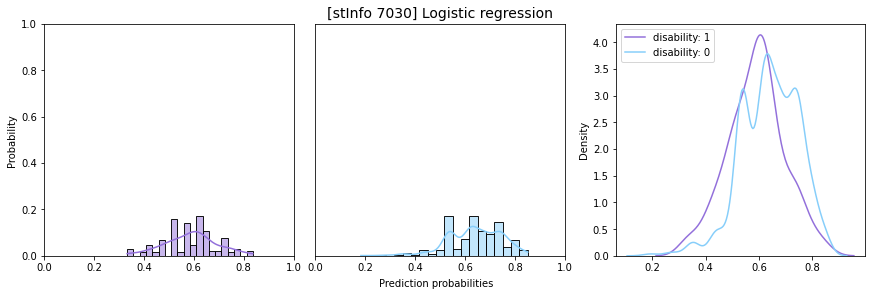

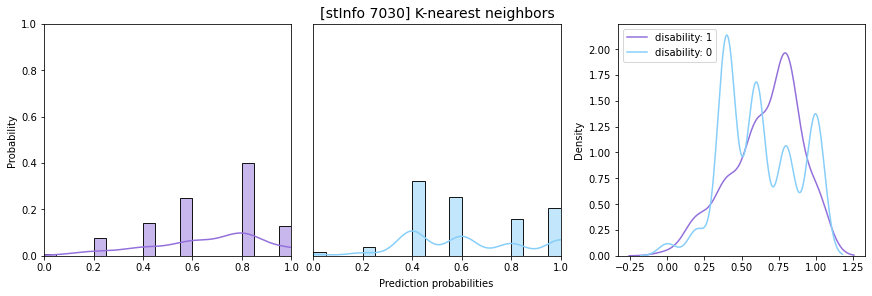

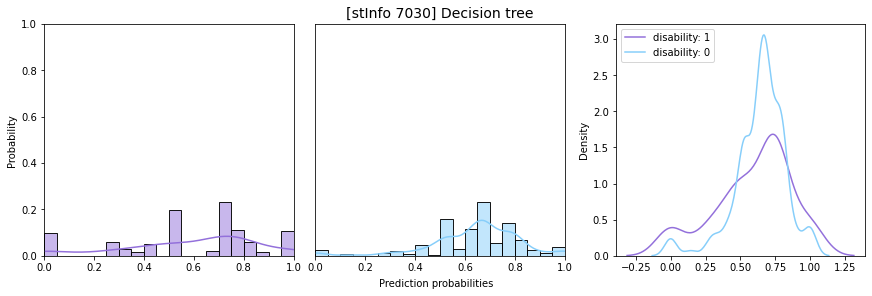

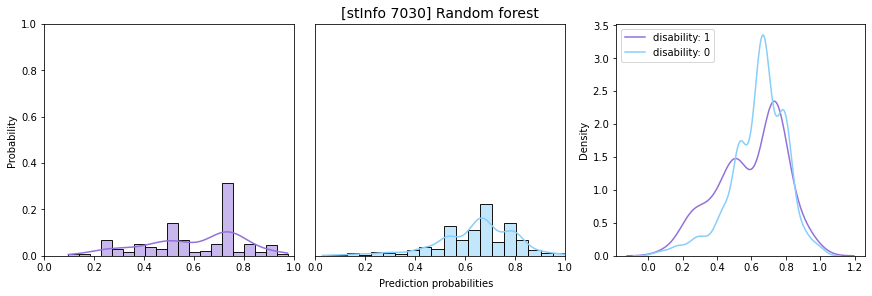

In [32]:
# Disability

for model in models:

    if model == clf_lr:
        model_name = "Logistic regression"
    elif model == clf_knearest:
        model_name = "K-nearest neighbors"
    elif model == clf_dt:
        model_name = "Decision tree"
    else:
        model_name = "Random forest"

    fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
    fig.supxlabel("Prediction probabilities", fontsize=10)
    ax0 = sns.histplot(ax=axes[0], data=model.predict_proba(X_test_disability_1)[:, 1], kde=True, stat="probability", color="mediumpurple", bins=20)
    ax0.set_ylim(0, 1)
    ax0.set_xlim(0, 1)
    ax1 = sns.histplot(ax=axes[1], data=model.predict_proba(X_test_disability_0)[:, 1], kde=True, stat="probability", color="lightskyblue", bins=20)
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, 1)
    ax1.set_yticklabels([]) # turn off y ticks labels
    ax1.yaxis.set_visible(False)
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_disability_1)[:, 1], color="mediumpurple", label="disability: 1")
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_disability_0)[:, 1], color="lightskyblue", label="disability: 0")
    #ax2.yaxis.tick_right()
    #ax2.yaxis.set_label_position("right")
    plt.legend(loc="upper left")
    ax1.set_title(f"[{DATA} {SPLIT}] {model_name}", loc="center", fontsize=14)

## Determining groups from the probability estimates of the models

In [33]:
# Determine groups thresholds
proba_estimates_lr = clf_lr.predict_proba(X_test)

Text(0.5, 1.0, 'Probability estimates for class 1')

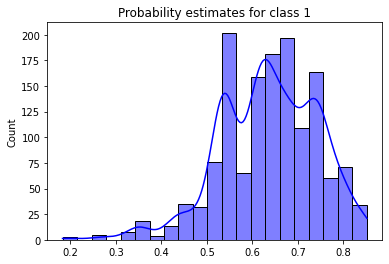

In [34]:
plot = sns.histplot(data=proba_estimates_lr[:,1], kde=True, color="blue") # kernel density estimation
plot.set_title(label="Probability estimates for class 1")